# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from util import utils

## Loading the image

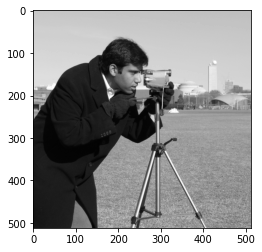

In [2]:
image = utils.uint8_to_float(skimage.data.camera())
plt.imshow(image, cmap="gray")

## Function to plot the different steps in the process

In [3]:
def plot_process(image, fft, fft_kernel, filtered_fft, convolved_image, filter_type: str):
    rows, cols, size, cmap = 1, 5, 4, "gray"
    plt.figure(figsize=(cols*size, rows*size))
    
    # Show original Image
    plt.subplot(rows, cols, 1)
    plt.imshow(image, cmap=cmap)
    # Visualize FFT
    plt.subplot(rows, cols, 2) 
    plt.imshow(utils.fft_to_image(fft), cmap=cmap)
    # Visualize FFT kernel
    plt.subplot(rows, cols, 3)
    plt.imshow(utils.fft_to_image(fft_kernel), cmap=cmap)
    # Visualize filtered FFT image
    plt.subplot(rows, cols, 4)
    plt.imshow(utils.fft_to_image(filtered_fft), cmap=cmap)
    # Visualize filtered spatial image
    plt.subplot(rows, cols, 5)
    plt.imshow(convolved_image, cmap=cmap)
    
    plt.tight_layout()
    plt.savefig(utils.image_output_dir.joinpath(f"task4a-process-{filter_type}"))

# Task 4a
Implement a function that takes an grayscale image, and a kernel in the frequency domain, and applies the convolution theorem (seen in Equation 4 in assignment). 

Try it out on a low-pass filter and a high-pass filter on the grayscale image ”camera man”.

Include in your report the filtered images and the before/after amplitude $|F\{f\}|$ of the transform. 
Make sure to shift the zero-frequency component to the center before displaying the amplitude.

In [4]:
def convolve_image(image: np.array, fft_kernel: np.array, filter_type: str):
    # Create FFT
    fft = np.fft.fft2(image)
    # Create filtered FFT image
    filtered_fft = fft * fft_kernel
    # Create filtered spatial image (inverse FFT)
    convolved_image = np.fft.ifft2(filtered_fft).real
    
    # Plot the different filters and images
    plot_process(image, fft, fft_kernel, filtered_fft, convolved_image, filter_type)
    utils.save_im(f"task4a-{filter_type}.png", convolved_image)
        
    return convolved_image

## Low-Pass Filter

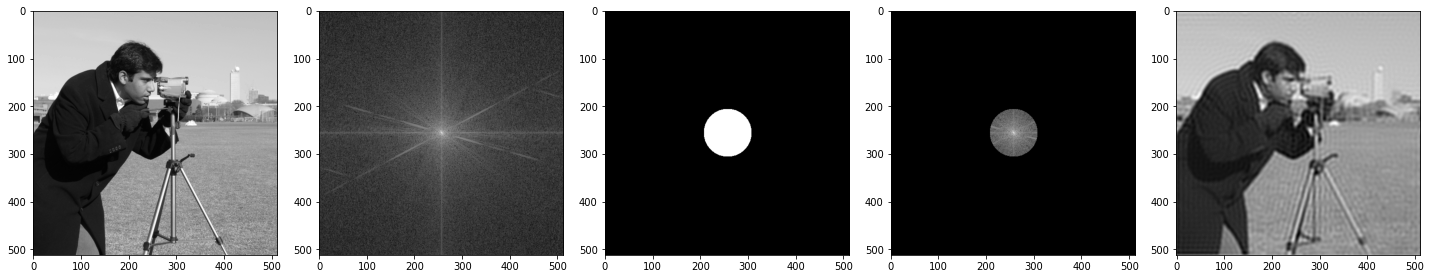

In [5]:
frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(image, radius=50)
image_low_pass = convolve_image(image, frequency_kernel_low_pass, filter_type="low-pass")

## High-Pass Filter

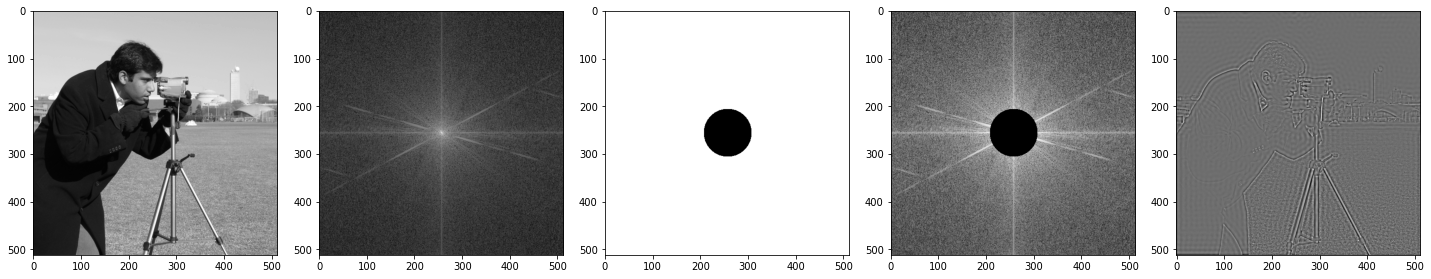

In [6]:
frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(image, radius=50)
image_high_pass = convolve_image(image, frequency_kernel_high_pass, filter_type="high-pass")